# Projet Math-Info: Lignes de niveau
  $\quad$L’objectif de ce projet numérique est de développer un programme Python permettant de calculer les lignes de niveau d’une fonction $f$ de deux variables réelles et à valeurs réelles (supposée continûment différentiable), c’est-à-dire les ensembles de la forme\
$ \bf{\qquad {(x,y)∈ R^{2}|f(x,y)=c}}$ où $\bf{c∈R}.$ \
La représentation graphique de ces courbes est un tracé de contour (cf. les
exemples d’usage de la fonction contour de matplotlib).
## Sommaire:
 ### - find_seed
 ### - contour
 ### - simple_contour version "naïve"
 ### - simple_contour version "méthode de Newton

In [6]:
import numpy as np
from math import *

def f(x,y):
    """
    fonction test
    """
    return(2*(exp(-x**2-y**2)-exp(-(x-1)**2-(y-1)**2)))

def g(x,y):
    """
    fonction test
    """
    return(sqrt(x**2+y**2))

$\Large{\underline{find_seed(g,c,delta)}}$

### Remarque : 
 Ici par rapport aux notations des polycopiés, on a g qui est fonction d'une seule variable, c'est à dire par exemple $g(t) = f(0,t)$ pour tout t appartenant à $[0,1]$.

Une condition raisonnable sur $f, c, f(0,0)$ et  $f(0,1)$ (ou sur $g, c, g(0)$ et  $g(1))$ \
On peut demander au minimum $f \ C^{0}$ et $ \min{(f(0,0),f(0,1))} \leq c \leq \max{(f(0,0),f(0,1))}$ ou encore plus généralement $g \ C^{0}$ et $\min{(g(0),g(1))} \leq c \leq \max{(g(0),g(1))}$. \
 Cela garantit en effet que c appartient à $g([0,1]) = f({0}\times[0,1])$ par le théorème des valeurs intermédiaires.
 
 Ce n'est pas une condition nécéssaire puisqu'il serait nécessaire et suffisant pour une fonction continue d'avoir $\inf(f) \leq c \leq \sup(f)$ sur $[0,1]$, mais cette condition est minimale pour une condition portant sur $g, g(0)$ et $g(1)$ puisqu'il existe des fonctions non continues vérifiant $\min{(g(0),g(1))} \leq c \leq \max{(g(0),g(1))}$ et c n'appartient pas à l'image de $[0,1]$ par g, et des fonctions continues telles que l'on n'est pas $\min{(g(0),g(1))} \leq c \leq \max{(g(0),g(1))}$ et c n'appartient pas à l'image de $[0,1]$ par g.

### Avec cette hypothèse sur g, on peut proposer une approche par dichotomie :
#### - invariant de boucle: $f(ta)= a \leq c \leq b \leq f(tb)$
#### - variant de boucle: $ta-tb = (\frac{1}{2})^{k}$

In [1]:
def find_seed(g, c=0, eps=2**(-26)):
    """
    recherche d'une solution de t de [0,1] tq g(t) = c,
    à condition que c soit dans [g(0),g(1)] ou [g(1),g(0)]
    """
    a, b = g(0),g(1)
    ta, tb = 0, 1
    if a > b:
        a, b = b, a
        ta, tb = tb, ta
    try:
        if c < a or c > b :
            raise ValueError
    except ValueError:
        return(None)
    #invariants: f(ta)=a<=c<=b=f(tb)
    t = (ta + tb)/2
    while abs(g(t)-c) > eps :
        if g(t) < c:
            a = g(t)
            ta = t
        else:
            b = g(t)
            tb = t
        t = (ta + tb)/2
    return t

## contour(f,c,xc,yc,delta)

 On supposera dans cette partie déjà écrite la fonction simple_contour.\
Le principe est de découper la zone en quadrillage avec les tableaux $xc$ et $yc$.\
Dans chaque case de ce quadrillage, on applique simple_contour à une fonction $ftilde$ qui correspond à $f$ par la transformation affine $(xa + (xb-xa)\times tx, ya + (yb-ya)\times ty)$\
On obtient les coordonnées des points de $[0,1]²$ en lesquels $ftilde$ vaut $c$\
On en déduit par $x,y = (xa + (xb-xa)\times tx, ya + (yb-ya)\times ty)$ les coordonnées des points dans $[xa,xb]\times[ya,yb]$ en lesquels $f$ vaut $c$.

In [10]:
def contour(f, c=0.0, xc=[0.0,1.0], yc=[0.0,1.0], delta=0.01):
    """
    renvoie des fragments pour chaque case du quadrillage (xc,yc) sous la forme de 2 listes de tableaux
    """
    nx = len(xc)
    ny = len(yc)
    xs = []
    ys = []
    for i in range(0,nx-1):
        xa,xb = xc[i],xc[i+1]
        for j in range(0,ny-1):
            ya,yb = yc[j],yc[j+1]
            def ftilde(tx,ty):
                """
                fonction de [0,1]X[0,1]
                """
                return(f(xa+(xb-xa)*tx,ya+(yb-ya)*ty))
            TX,TY = simple_contour(ftilde,c,delta)
            x,y = (xb-xa)*TX + xa, (yb-ya)*TY + ya
            xs.append(x)
            ys.append(y)
    return(xs,ys)

## simple_contour(f,c,delta) version "naïve"

On divise l'axe des abscisses en abscisses chacune écartée de $delta$ $(xi = i\times delta)$\
On trouve pour chacune de ces abscisses une ordonnée $yi$ grâce à find_seed avec la fonction $g(t) = f(xi,t)$

In [9]:
def simple_contour(f,c=0.0,delta = 0.01):
    """
    renvoie une partie de courbe de niveau
    """
    x = np.arange(0,1,delta)
    y = np.zeros(len(x),dtype = float)
    for i,xi in enumerate(x):
        yi = find_seed(lambda t : f(xi,t),c)
        if yi == None:
            y[i] = None
        else:
            y[i] = yi
    return(x,y)


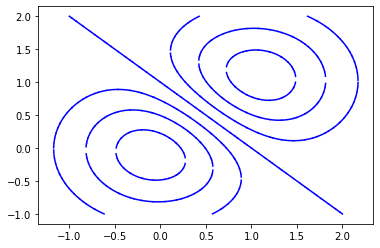

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in [-1.5,-1,-0.5,0,0.5,1,1.5]:
    xc, yc = np.linspace(-2.,3.,40), np.linspace(-1.,2.,40)
    xs, ys = contour(f,c,xc,yc)
    for x,y in zip(xs,ys):
        plt.plot(x,y,'-b')
plt.show()
